In [1]:
!pip install numpy
!pip install pandas
!pip install jupyter
!pip install matplotlib
!pip install scikit-learn
!pip install Pillow
!pip install opencv-python
!pip install img2vec_pytorch

## 一、传统偏好发现

### 年龄偏好分析

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Reading ratings file
ratings = pd.read_csv('./ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('./users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('./movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

# Reading movies info file
movies_info = pd.read_csv('./info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [3]:
R=ratings.groupby('movie_id')['rating'].mean()
N=ratings.groupby('movie_id')['rating'].count()
popular=pd.DataFrame({'rating':R,'count':N})
W=popular['count'].apply(lambda x: max(0.5*x/popular['count'].mean(),1))
popular['rating']=W*popular['rating']+(1-W)*popular['rating'].mean()
popular=popular.sort_values(by='rating',ascending=False)
popular_percentile=popular['rating'].quantile(0.9)
popular=popular[popular['rating']>=popular_percentile]
print(popular)

             rating  count
movie_id                  
2858      10.088146   3428
260        9.970312   2991
1196       9.077795   2990
1198       9.008716   2514
318        8.667024   2227
...             ...    ...
1280       4.173285    277
955        4.169492    413
2726       4.169231    130
2948       4.168559    771
3424       4.167839    781

[371 rows x 2 columns]


In [4]:
age_users = pd.merge(users, ratings, on='user_id', how='outer')
age_users = age_users[age_users['movie_id'].isin(popular.index)]
display(age_users)
# 得到有哪些年龄段
unique_age_descriptions = age_users['age_desc'].unique()
print(unique_age_descriptions)

,user_id,gender,zipcode,age_desc,occ_desc,movie_id,rating,timestamp
0,1,F,48067,Under 18,K-12 student,1193,5,978300760
2,1,F,48067,Under 18,K-12 student,914,3,978301968
3,1,F,48067,Under 18,K-12 student,3408,4,978300275
4,1,F,48067,Under 18,K-12 student,2355,5,978824291
5,1,F,48067,Under 18,K-12 student,1197,3,978302268
...,...,...,...,...,...,...,...,...
1000201,6040,M,11106,25-34,doctor/health care,1080,4,957717322
1000202,6040,M,11106,25-34,doctor/health care,1089,4,956704996
1000203,6040,M,11106,25-34,doctor/health care,1090,3,956715518
1000205,6040,M,11106,25-34,doctor/health care,1094,5,956704887


['Under 18' '56+' '25-34' '45-49' '50-55' '35-44' '18-24']


In [5]:
mean_ratings_by_age_movie = age_users.groupby(['age_desc', 'movie_id'])['rating'].mean().unstack()
display(mean_ratings_by_age_movie)

movie_id,1,6,11,17,21,32,34,36,39,47,...,3730,3751,3753,3789,3793,3801,3881,3888,3897,3911
age_desc,,,,,,,,,,,,,,,,,,,,,
18-24,4.017857,4.027149,3.693989,3.982906,3.613208,4.092105,3.609929,3.975460,3.551205,4.309764,...,4.354839,3.900794,3.780919,4.000000,3.938875,4.400000,5.0,NaN,4.286996,4.009174
25-34,4.201266,3.911058,3.734848,4.010239,3.557047,3.979412,3.957813,3.898123,3.651376,4.074349,...,4.196850,3.896552,3.622030,3.866667,3.851330,4.081081,NaN,NaN,4.196850,4.058608
35-44,4.302600,3.759494,3.848341,4.000000,3.651852,3.897059,4.023684,4.011628,3.659389,4.018868,...,4.267857,3.826990,3.791667,4.529412,3.757322,4.076923,NaN,5.0,4.116959,4.000000
45-49,4.104895,3.711111,3.988889,4.191011,3.798077,3.611650,4.045161,3.892857,3.706522,3.941176,...,4.179104,4.029412,3.811881,3.920000,3.633803,4.230769,NaN,4.0,4.194444,4.250000
50-55,4.092593,3.576923,3.975000,4.096386,3.750000,3.720930,3.960938,4.027778,3.704918,3.651163,...,4.358209,3.878049,3.950617,4.208333,3.360000,4.200000,NaN,NaN,4.456140,4.159091
56+,3.886792,3.703704,3.884615,4.019608,3.727273,3.620690,3.948052,4.056604,3.829268,4.000000,...,4.219512,3.927273,3.803030,4.312500,3.230769,4.477273,NaN,NaN,4.238095,4.428571
Under 18,3.919643,3.904762,3.476190,3.750000,3.576923,4.189189,3.325843,4.454545,3.290323,4.137931,...,4.250000,3.589286,3.944444,5.000000,3.805195,4.333333,NaN,NaN,4.333333,3.772727


### 参考demo，对于每个年龄段分别和其他的所有做绝对值差作为评分的依据

In [6]:
Under_18_users = age_users[age_users['age_desc'] == 'Under 18']
else_users = age_users[age_users['age_desc'] != 'Under 18']

Under_18_users_mean = Under_18_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = Under_18_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
print(score)
score['score'] = score['rating_x'] * score['rating_y']
Under_18_preference = score.nlargest(10, 'score').reset_index()
print("18岁以下最偏好的10部电影：")
Under_18_preference_detail = pd.merge(Under_18_preference, movies, on='movie_id', how='inner')
Under_18_preference_detail = Under_18_preference_detail.drop(['rating_x', 'rating_y', 'score', 'count', 'movie_id'], axis=1) # 去除无需展示的列
Under_18_preference_detail['ranking'] = Under_18_preference_detail.index.to_series().apply(lambda x: x+1)
Under_18_preference_detail = Under_18_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(Under_18_preference_detail)

          rating_x  rating_y  count
movie_id                           
1        -0.240154  6.732588   2077
6         0.026634  4.353130    940
11       -0.324205  4.300855   1033
17       -0.282967  4.458884    835
21       -0.047889  4.206071   1356
...            ...       ...    ...
3801      0.103741  4.231156    199
3881           NaN  5.000000      1
3888           NaN  4.500000      2
3897      0.112403  5.057308    994
3911     -0.310737  4.254213    657

[371 rows x 3 columns]
18岁以下最偏好的10部电影：


,title,genres
ranking,,
1,GoodFellas (1990),Crime|Drama
2,Aparajito (1956),Drama
3,Trust (1990),Comedy|Drama
4,"Pawnbroker, The (1965)",Drama
5,Paradise Lost: The Child Murders at Robin Hood...,Documentary
6,"Thin Blue Line, The (1988)",Documentary
7,Seven Days in May (1964),Thriller
8,"Palm Beach Story, The (1942)",Comedy
9,Central Station (Central do Brasil) (1998),Drama


In [7]:
_18_24_users = age_users[age_users['age_desc'] == '18-24']
else_users = age_users[age_users['age_desc'] != '18-24']

_18_24_users_mean = _18_24_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _18_24_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_18_24_preference = score.nlargest(10, 'score').reset_index()
print("18-24岁最偏好的10部电影：")
_18_24_preference_detail = pd.merge(_18_24_preference, movies, on='movie_id', how='inner')
_18_24_preference_detail = _18_24_preference_detail.drop(['rating_x', 'rating_y', 'count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_18_24_preference_detail['ranking'] = _18_24_preference_detail.index.to_series().apply(lambda x: x+1)
_18_24_preference_detail = _18_24_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_18_24_preference_detail)

18-24岁最偏好的10部电影：


,title,genres
ranking,,
1,Dangerous Game (1993),Drama
2,"Face in the Crowd, A (1957)",Drama
3,American Beauty (1999),Comedy|Drama
4,"Palm Beach Story, The (1942)",Comedy
5,Fight Club (1999),Drama
6,NÃ©nette et Boni (1996),Drama
7,Sanjuro (1962),Action|Adventure
8,Before the Rain (Pred dozhdot) (1994),Drama
9,Pather Panchali (1955),Drama


In [8]:
_25_34_users = age_users[age_users['age_desc'] == '25-34']
else_users = age_users[age_users['age_desc'] != '25-34']

_25_34_users_mean = _25_34_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _25_34_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_25_34_preference = score.nlargest(10, 'score').reset_index()
print("25-34岁最偏好的10部电影：")
_25_34_preference_detail = pd.merge(_25_34_preference, movies, on='movie_id', how='inner')
_25_34_preference_detail = _25_34_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_25_34_preference_detail['ranking'] = _25_34_preference_detail.index.to_series().apply(lambda x: x+1)
_25_34_preference_detail = _25_34_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_25_34_preference_detail)

25-34岁最偏好的10部电影：


,title,genres
ranking,,
1,"CallejÃ³n de los milagros, El (1995)",Drama
2,"Inheritors, The (Die Siebtelbauern) (1998)",Drama
3,Return with Honor (1998),Documentary
4,Soft Fruit (1999),Comedy|Drama
5,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
6,"Decline of Western Civilization, The (1981)",Documentary
7,"Eighth Day, The (Le HuitiÃ¨me jour ) (1996)",Drama
8,"Good, The Bad and The Ugly, The (1966)",Action|Western
9,"Breakfast Club, The (1985)",Comedy|Drama


In [9]:
_35_44_users = age_users[age_users['age_desc'] == '35-44']
else_users = age_users[age_users['age_desc'] != '35-44']

_35_44_users_mean = _35_44_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _35_44_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_35_44_preference = score.nlargest(10, 'score').reset_index()
print("35-44岁最偏好的10部电影：")
_35_44_preference_detail = pd.merge(_35_44_preference, movies, on='movie_id', how='inner')
_35_44_preference_detail = _35_44_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_35_44_preference_detail['ranking'] = _35_44_preference_detail.index.to_series().apply(lambda x: x+1)
_35_44_preference_detail = _35_44_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_35_44_preference_detail)

35-44岁最偏好的10部电影：


,title,genres
ranking,,
1,Window to Paris (1994),Comedy
2,Skipped Parts (2000),Drama|Romance
3,Firelight (1997),Drama
4,Time of the Gypsies (Dom za vesanje) (1989),Drama
5,Jupiter's Wife (1994),Documentary
6,"Apple, The (Sib) (1998)",Drama
7,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical
8,Lamerica (1994),Drama
9,"Pawnbroker, The (1965)",Drama


In [10]:
_45_49_users = age_users[age_users['age_desc'] == '45-49']
else_users = age_users[age_users['age_desc'] != '45-49']

_45_49_users_mean = _45_49_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _45_49_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_45_49_preference = score.nlargest(10, 'score').reset_index()
print("45-49岁最偏好的10部电影：")
_45_49_preference_detail = pd.merge(_45_49_preference, movies, on='movie_id', how='inner')
_45_49_preference_detail = _45_49_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_45_49_preference_detail['ranking'] = _45_49_preference_detail.index.to_series().apply(lambda x: x+1)
_45_49_preference_detail = _45_49_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_45_49_preference_detail)

45-49岁最偏好的10部电影：


,title,genres
ranking,,
1,Jupiter's Wife (1994),Documentary
2,Before the Rain (Pred dozhdot) (1994),Drama
3,For All Mankind (1989),Documentary
4,"Face in the Crowd, A (1957)",Drama
5,42 Up (1998),Documentary
6,Misery (1990),Horror
7,Sleepless in Seattle (1993),Comedy|Romance
8,"Bicycle Thief, The (Ladri di biciclette) (1948)",Drama
9,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical


In [11]:
_50_55_users = age_users[age_users['age_desc'] == '50-55']
else_users = age_users[age_users['age_desc'] != '50-55']

_50_55_users_mean = _50_55_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _50_55_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_50_55_preference = score.nlargest(10, 'score').reset_index()
print("50-55岁最偏好的10部电影：")
_50_55_preference_detail = pd.merge(_50_55_preference, movies, on='movie_id', how='inner')
_50_55_preference_detail = _50_55_preference_detail.drop(['rating_x', 'rating_y', 'count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_50_55_preference_detail['ranking'] =_50_55_preference_detail.index.to_series().apply(lambda x: x+1)
_50_55_preference_detail = _50_55_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_50_55_preference_detail)

50-55岁最偏好的10部电影：


,title,genres
ranking,,
1,Dry Cleaning (Nettoyage Ã sec) (1997),Drama
2,"Bells, The (1926)",Crime|Drama
3,Ed's Next Move (1996),Comedy
4,Before the Rain (Pred dozhdot) (1994),Drama
5,To Live (Huozhe) (1994),Drama
6,Sleepless in Seattle (1993),Comedy|Romance
7,M*A*S*H (1970),Comedy|War
8,"Apple, The (Sib) (1998)",Drama
9,Yojimbo (1961),Comedy|Drama|Western


In [12]:
_56_users = age_users[age_users['age_desc'] == '56+']
else_users = age_users[age_users['age_desc'] != '56+']

_56_users_mean = _56_users.groupby('movie_id')['rating'].mean()
else_users_mean = else_users.groupby('movie_id')['rating'].mean()

score = _56_users_mean - else_users_mean
score = pd.merge(score, popular, on='movie_id', how='outer') 
score['score'] = score['rating_x'] * score['rating_y']
_56_preference = score.nlargest(10, 'score').reset_index()
print("56岁以上最偏好的10部电影：")
_56_preference_detail = pd.merge(_56_preference, movies, on='movie_id', how='inner')
_56_preference_detail = _56_preference_detail.drop(['rating_x', 'rating_y','count', 'score', 'movie_id'], axis=1) # 去除无需展示的列
_56_preference_detail['ranking'] =_56_preference_detail.index.to_series().apply(lambda x: x+1)
_56_preference_detail = _56_preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
display(_56_preference_detail)

56岁以上最偏好的10部电影：


,title,genres
ranking,,
1,Firelight (1997),Drama
2,Aparajito (1956),Drama
3,"Conformist, The (Il Conformista) (1970)",Drama
4,Paradise Lost: The Child Murders at Robin Hood...,Documentary
5,Before the Rain (Pred dozhdot) (1994),Drama
6,Return with Honor (1998),Documentary
7,Soft Fruit (1999),Comedy|Drama
8,"Decline of Western Civilization, The (1981)",Documentary
9,Creature Comforts (1990),Animation|Comedy


### 不同类型电影的不同年龄段偏好可视化

In [13]:
data = pd.merge(ratings, users, how='outer')
data = pd.merge(data, movies, how='outer')
data = data.dropna(subset=['age_desc'])
data

,user_id,movie_id,rating,timestamp,gender,zipcode,age_desc,occ_desc,title,genres
0,1.0,1193,5.0,978300760.0,F,48067,Under 18,K-12 student,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,70072,56+,self-employed,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,32793,25-34,programmer,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,22903,25-34,executive/managerial,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,95350,50-55,academic/educator,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949.0,2198,5.0,958846401.0,M,47901,18-24,technician/engineer,Modulations (1998),Documentary
1000205,5675.0,2703,3.0,976029116.0,M,30030,35-44,sales/marketing,Broken Vessels (1998),Drama
1000206,5780.0,2845,1.0,958153068.0,M,92886,18-24,technician/engineer,White Boys (1999),Drama
1000207,5851.0,3607,5.0,957756608.0,F,55410,18-24,writer,One Little Indian (1973),Comedy|Drama|Western


In [14]:
age_groups = data['age_desc'].unique()  # 获取所有独特的年龄段描述

# 为每个年龄段创建一个字典来存储数据集
data_by_age_group = {}
counts_by_age_group = {}

# 分割数据集并计算每个年龄段的观影人数
for age_group in age_groups:
    # 分割数据集
    data_by_age_group[age_group] = data[data['age_desc'] == age_group]
    
    # 计算每个年龄段的观影人数
    counts_by_age_group[age_group] = data_by_age_group[age_group].shape[0]
    
for age_group, dataset in data_by_age_group.items():
    print(f"Data shape for age group {age_group}: {dataset.shape}")

Data shape for age group Under 18: (27211, 10)
Data shape for age group 56+: (38780, 10)
Data shape for age group 25-34: (395556, 10)
Data shape for age group 50-55: (72490, 10)
Data shape for age group 18-24: (183536, 10)
Data shape for age group 45-49: (83633, 10)
Data shape for age group 35-44: (199003, 10)


In [15]:
# 看看总共有多少个风格
genre_list = []
for i in movies.genres:
    genre = i.split(sep='|')
    genre_list += genre
genre_list = list(set(genre_list))
genre_list

['Thriller',
 'Western',
 'Crime',
 "Children's",
 'Comedy',
 'Sci-Fi',
 'Animation',
 'Mystery',
 'Adventure',
 'Horror',
 'Drama',
 'War',
 'Romance',
 'Documentary',
 'Musical',
 'Film-Noir',
 'Fantasy',
 'Action']

In [16]:
# 统计每个电影的风格
num_movies = movies.shape[0]
for genre in genre_list:
    movies[genre] = 0
for i in movies.index:
    genre = movies.loc[i].genres.split(sep='|')
    for j in genre:
        movies[j][i] = 1
movies

,movie_id,title,genres,Thriller,Western,Crime,Children's,Comedy,Sci-Fi,Animation,...,Adventure,Horror,Drama,War,Romance,Documentary,Musical,Film-Noir,Fantasy,Action
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [17]:
data_2 = pd.merge(ratings, users, how='outer')
data_2 = pd.merge(data, movies, how='outer')
data_2 = data_2.dropna(subset=['age_desc'])
data_2.head()

,user_id,movie_id,rating,timestamp,gender,zipcode,age_desc,occ_desc,title,genres,...,Adventure,Horror,Drama,War,Romance,Documentary,Musical,Film-Noir,Fantasy,Action
0,1.0,1193,5.0,978300760.0,F,48067,Under 18,K-12 student,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,1,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,70072,56+,self-employed,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,1,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,32793,25-34,programmer,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,1,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,22903,25-34,executive/managerial,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,1,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,95350,50-55,academic/educator,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,1,0,0,0,0,0,0,0


In [18]:
df_age = pd.DataFrame(np.zeros((len(genre_list), 28)), index=genre_list, columns=[['Under 18', 'Under 18', 'Under 18', 'Under 18', '50-55', '50-55', '50-55', '50-55', '25-34', '25-34', '25-34', '25-34', '35-44', '35-44', '35-44', '35-44', '18-24', '18-24', '18-24', '18-24', '45-49', '45-49', '45-49', '45-49', '56+', '56+', '56+', '56+' ], ['mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion', 'mean', 'std', 'count', 'portion']])
df_age

Under 18                    50-55                    25-34       \
                mean  std count portion  mean  std count portion  mean  std   
Thriller         0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Western          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Crime            0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Children's       0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Comedy           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Sci-Fi           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Animation        0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Mystery          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Adventure        0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Horror           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Drama            0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
War              0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Romance          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Documentary      0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Musical          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Film-Noir        0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Fantasy          0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   
Action           0.0  0.0   0.0     0.0   0.0  0.0   0.0     0.0   0.0  0.0   

             ... 18-24         45-49                     56+             \
             ... count portion  mean  std count portion mean  std count   
Thriller     ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Western      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Crime        ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Children's   ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Comedy       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Sci-Fi       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Animation    ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Mystery      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Adventure    ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Horror       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Drama        ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
War          ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Romance      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Documentary  ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Musical      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Film-Noir    ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Fantasy      ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   
Action       ...   0.0     0.0   0.0  0.0   0.0     0.0  0.0  0.0   0.0   

                     
            portion  
Thriller        0.0  
Western         0.0  
Crime           0.0  
Children's      0.0  
Comedy          0.0  
Sci-Fi          0.0  
Animation       0.0  
Mystery         0.0  
Adventure       0.0  
Horror          0.0  
Drama           0.0  
War             0.0  
Romance         0.0  
Documentary     0.0  
Musical         0.0  
Film-Noir       0.0  
Fantasy         0.0  
Action          0.0  

[18 rows x 28 columns]

In [19]:
age_groups = data_2['age_desc'].unique()  # 获取所有独特的年龄段描述
print(age_groups)
for i in genre_list:
    for age in age_groups:
        # 为每个年龄段筛选数据
        data_age = data_2[data_2['age_desc'] == age]
        data_age_i = data_age[data_age[i] == 1]
        mean_rating = data_age_i.rating.mean()
        std_rating = data_age_i.rating.std()
        data_age_i.rating = (data_age_i.rating - mean_rating) / std_rating
        
        # 存储统计数据
        df_age.loc[i, (age, 'mean')] = mean_rating
        df_age.loc[i, (age, 'std')] = std_rating
        df_age.loc[i, (age, 'count')] = data_age_i.shape[0]
        df_age.loc[i, (age, 'portion')] = df_age.loc[i, (age, 'count')] / data_age.shape[0]
df_age

['Under 18' '56+' '25-34' '50-55' '18-24' '45-49' '35-44']


Under 18                                  50-55            \
                 mean       std    count   portion      mean       std   
Thriller     3.550373  1.208835   4824.0  0.177281  3.709668  1.058810   
Western      3.576119  1.165637    335.0  0.012311  3.741322  1.050221   
Crime        3.710170  1.130880   1701.0  0.062511  3.810688  1.017261   
Children's   3.241642  1.259536   4337.0  0.159384  3.556555  1.082607   
Comedy       3.497491  1.197181  11162.0  0.410202  3.646868  1.065637   
Sci-Fi       3.478698  1.224071   4178.0  0.153541  3.564456  1.127834   
Animation    3.476113  1.227552   2449.0  0.090000  3.780020  1.042822   
Mystery      3.631522  1.236059    920.0  0.033810  3.885795  0.993026   
Adventure    3.449975  1.199981   3998.0  0.146926  3.628163  1.055881   
Horror       3.254184  1.336767   2211.0  0.081254  3.158940  1.316865   
Drama        3.794735  1.122580   7483.0  0.274999  3.878415  0.977691   
War          3.895437  1.163748   1578.0  0.057991  3.974184  0.987871   
Romance      3.621284  1.149813   3599.0  0.132263  3.758111  0.989728   
Documentary  3.730769  1.304663    130.0  0.004777  3.908108  1.021708   
Musical      3.568306  1.206016   1647.0  0.060527  3.798254  1.029027   
Film-Noir    4.145455  0.956530    330.0  0.012127  4.175401  0.868098   
Fantasy      3.317647  1.193179   1360.0  0.049980  3.581570  1.103658   
Action       3.506385  1.204259   6578.0  0.241740  3.611333  1.066981   

                                   25-34            ...    18-24            \
               count   portion      mean       std  ...    count   portion   
Thriller     13240.0  0.182646  3.535471  1.113675  ...  35877.0  0.195477   
Western       2420.0  0.033384  3.607826  1.118557  ...   2863.0  0.015599   
Crime         5520.0  0.076148  3.680321  1.089524  ...  15373.0  0.083760   
Children's    3890.0  0.053663  3.426873  1.151558  ...  16924.0  0.092211   
Comedy       23133.0  0.319120  3.490385  1.127556  ...  69980.0  0.381288   
Sci-Fi       10674.0  0.147248  3.443822  1.165055  ...  29033.0  0.158187   
Animation     2032.0  0.028031  3.701228  1.062195  ...  10269.0  0.055951   
Mystery       3520.0  0.048558  3.610818  1.100882  ...   6401.0  0.034876   
Adventure     9090.0  0.125397  3.443163  1.139864  ...  26324.0  0.143427   
Horror        4681.0  0.064574  3.200096  1.208010  ...  15184.0  0.082730   
Drama        29247.0  0.403463  3.726428  1.063288  ...  58104.0  0.316581   
War           6314.0  0.087102  3.841240  1.093815  ...  10874.0  0.059247   
Romance      11373.0  0.156891  3.546730  1.081073  ...  25656.0  0.139787   
Documentary    555.0  0.007656  3.946690  1.022971  ...   1081.0  0.005890   
Musical       3093.0  0.042668  3.619857  1.105955  ...   7555.0  0.041164   
Film-Noir     1870.0  0.025797  4.058725  0.946040  ...   2280.0  0.012423   
Fantasy       2127.0  0.029342  3.452484  1.126608  ...   7875.0  0.042907   
Action       17012.0  0.234681  3.453358  1.149686  ...  50186.0  0.273440   

                45-49                                    56+            \
                 mean       std    count   portion      mean       std   
Thriller     3.639657  1.041915  14933.0  0.178554  3.719749  1.066528   
Western      3.667135  1.049807   2133.0  0.025504  3.792198  1.043872   
Crime        3.750661  1.007496   6048.0  0.072316  3.832549  1.028783   
Children's   3.527593  1.129500   5400.0  0.064568  3.621822  1.091952   
Comedy       3.591789  1.076205  27890.0  0.333481  3.650949  1.101903   
Sci-Fi       3.482515  1.101840  13040.0  0.155919  3.497746  1.148707   
Animation    3.734856  1.057047   2889.0  0.034544  3.756233  1.055592   
Mystery      3.754350  1.013367   3851.0  0.046046  3.890545  0.998433   
Adventure    3.528963  1.074720  10738.0  0.128394  3.649064  1.076759   
Horror       3.262274  1.197644   6192.0  0.074038  3.254401  1.286739   
Drama        3.784356  1.003081  32141.0  0.384310  3.933465  0.973370   
War      

### 不同年龄在不同风格电影中的评分均值对比

<Figure size 2000x1000 with 0 Axes>

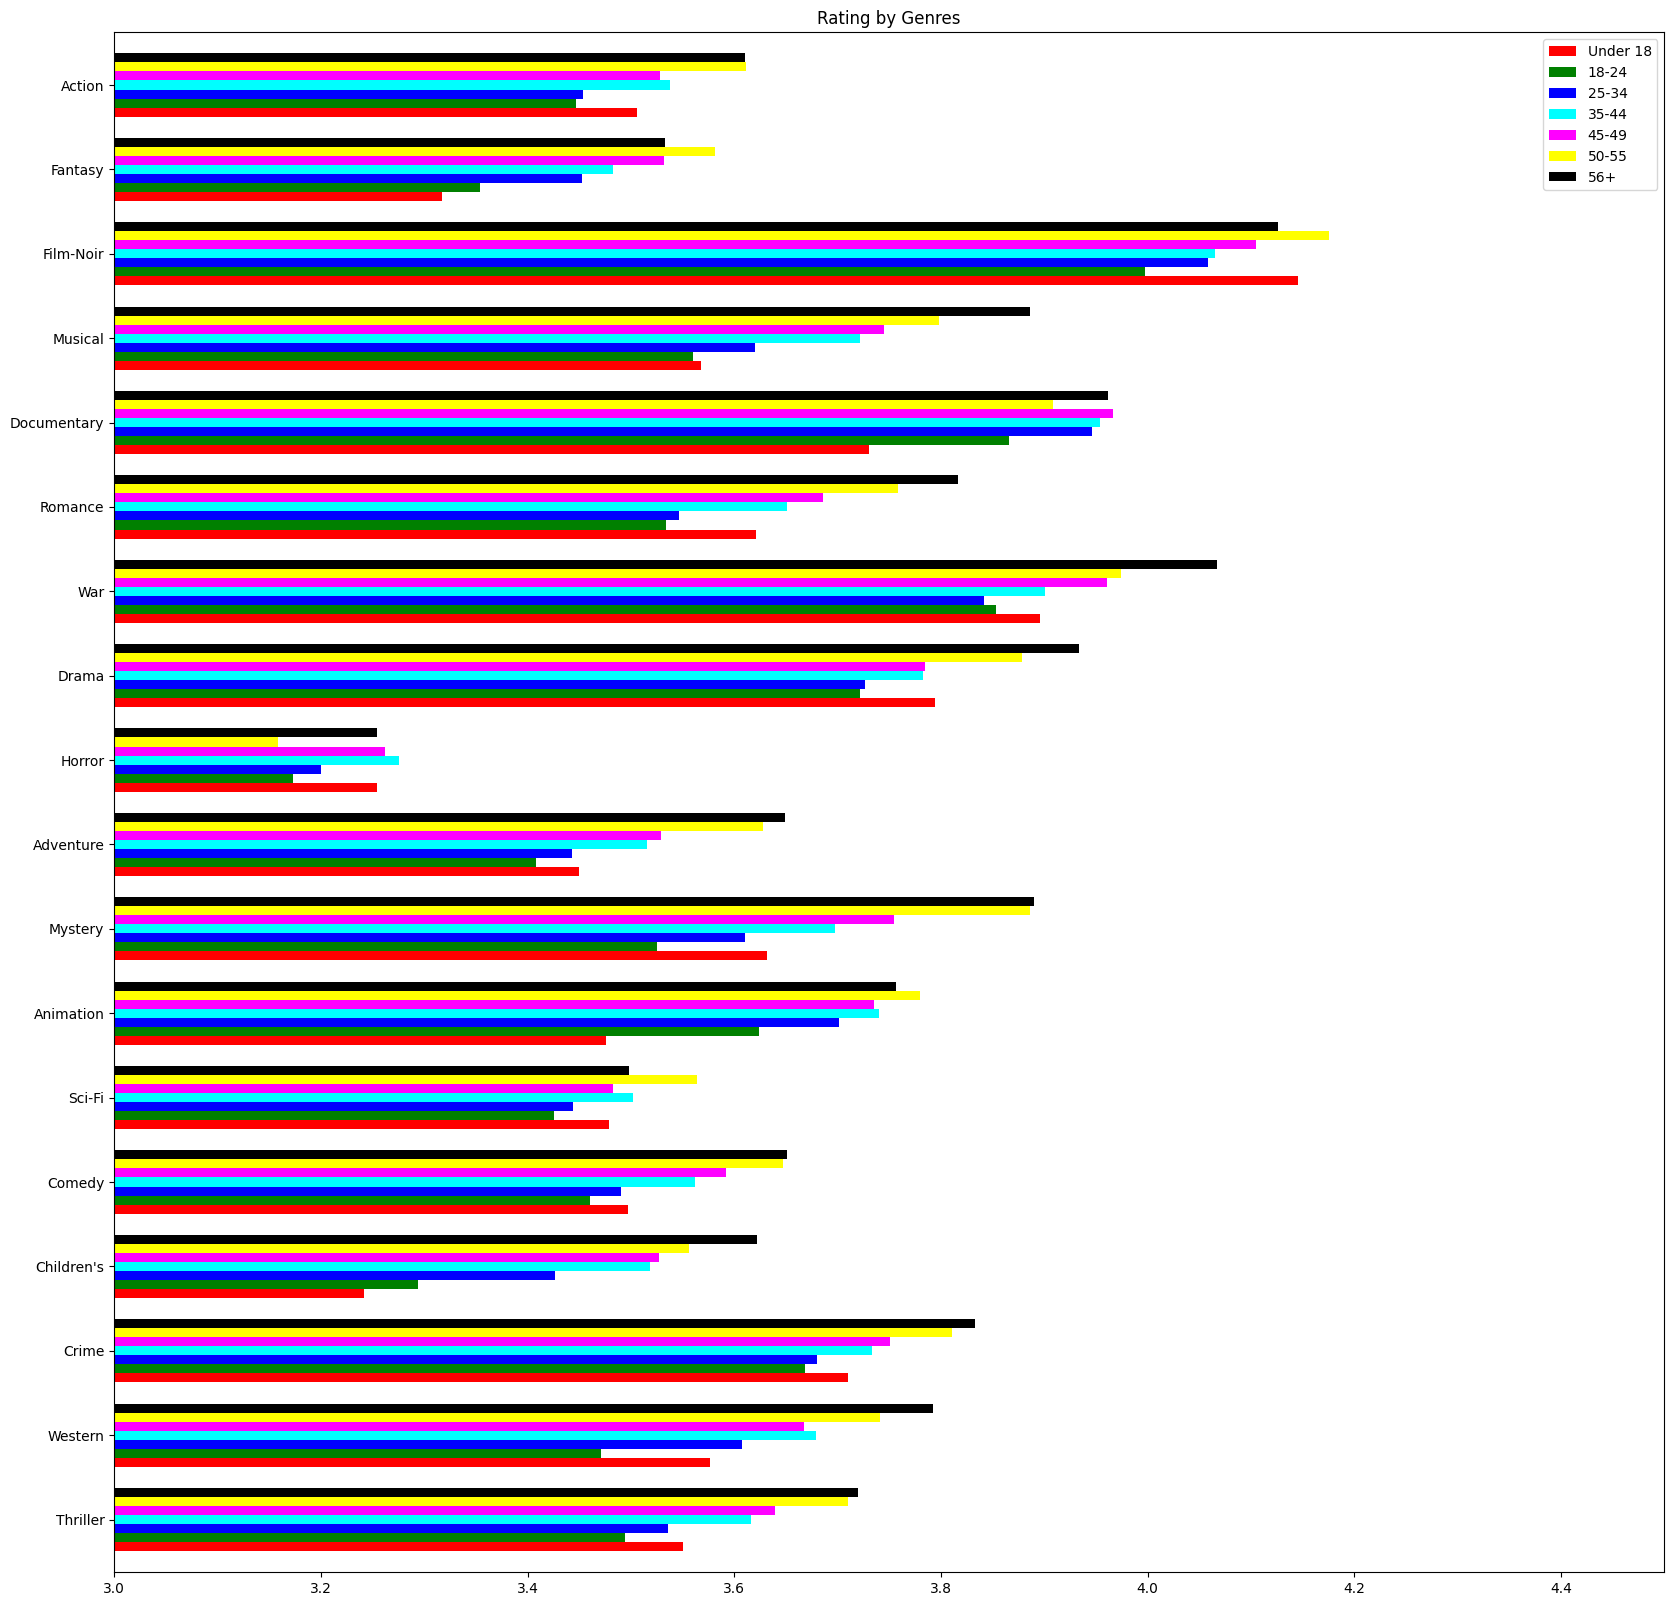

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) 
df_age.plot.barh(y=[('Under 18', 'mean'), ('18-24', 'mean'), ('25-34', 'mean'), ('35-44', 'mean'), ('45-49', 'mean'), ('50-55', 'mean'), ('56+', 'mean')], color= ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black'],width=0.75,figsize=((20,20)))
plt.title('Rating by Genres')
plt.xlim(3, 4.5)
plt.legend(['Under 18','18-24','25-34','35-44','45-49','50-55','56+'])
plt.savefig('ratings by genres.png')

### 不同年龄观看不同风格电影的数量对比。（只选择了18岁以下和56岁以上的两类）

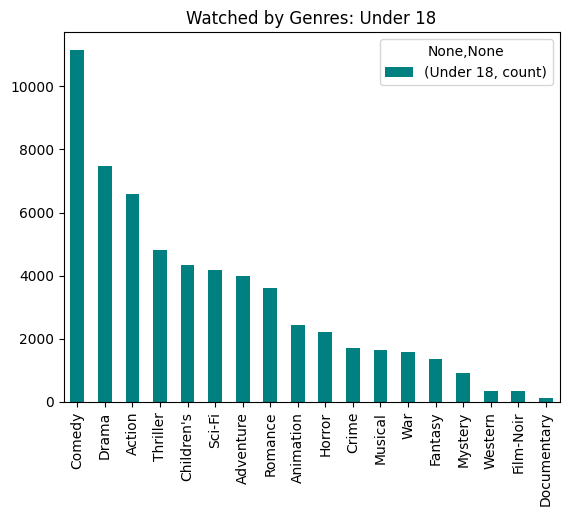

In [21]:
df_age.sort_values(by=('Under 18', 'count'), inplace=True, ascending=False)
df_age.plot.bar(y=('Under 18', 'count'), color=(0, 128/255, 128/255))
plt.title('Watched by Genres: Under 18')
plt.savefig('counts by genres: Under_18.png')

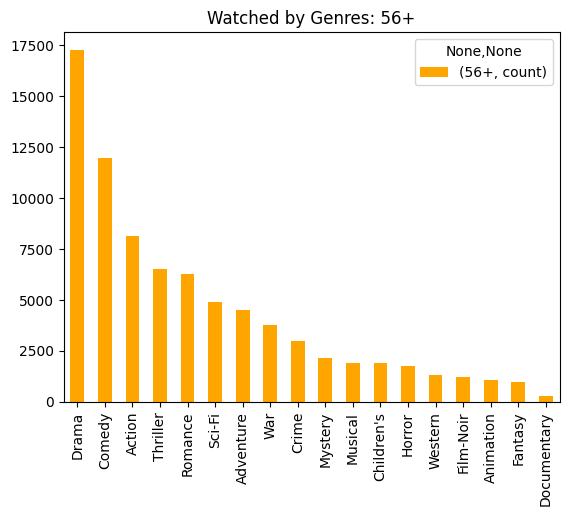

In [22]:
df_age.sort_values(by=('56+', 'count'), inplace=True, ascending=False)
df_age.plot.bar(y=('56+', 'count'), color='orange')
plt.title('Watched by Genres: 56+')
plt.savefig('counts by genres: 56+.png')

### 不同年龄在不同风格电影中的比例对比

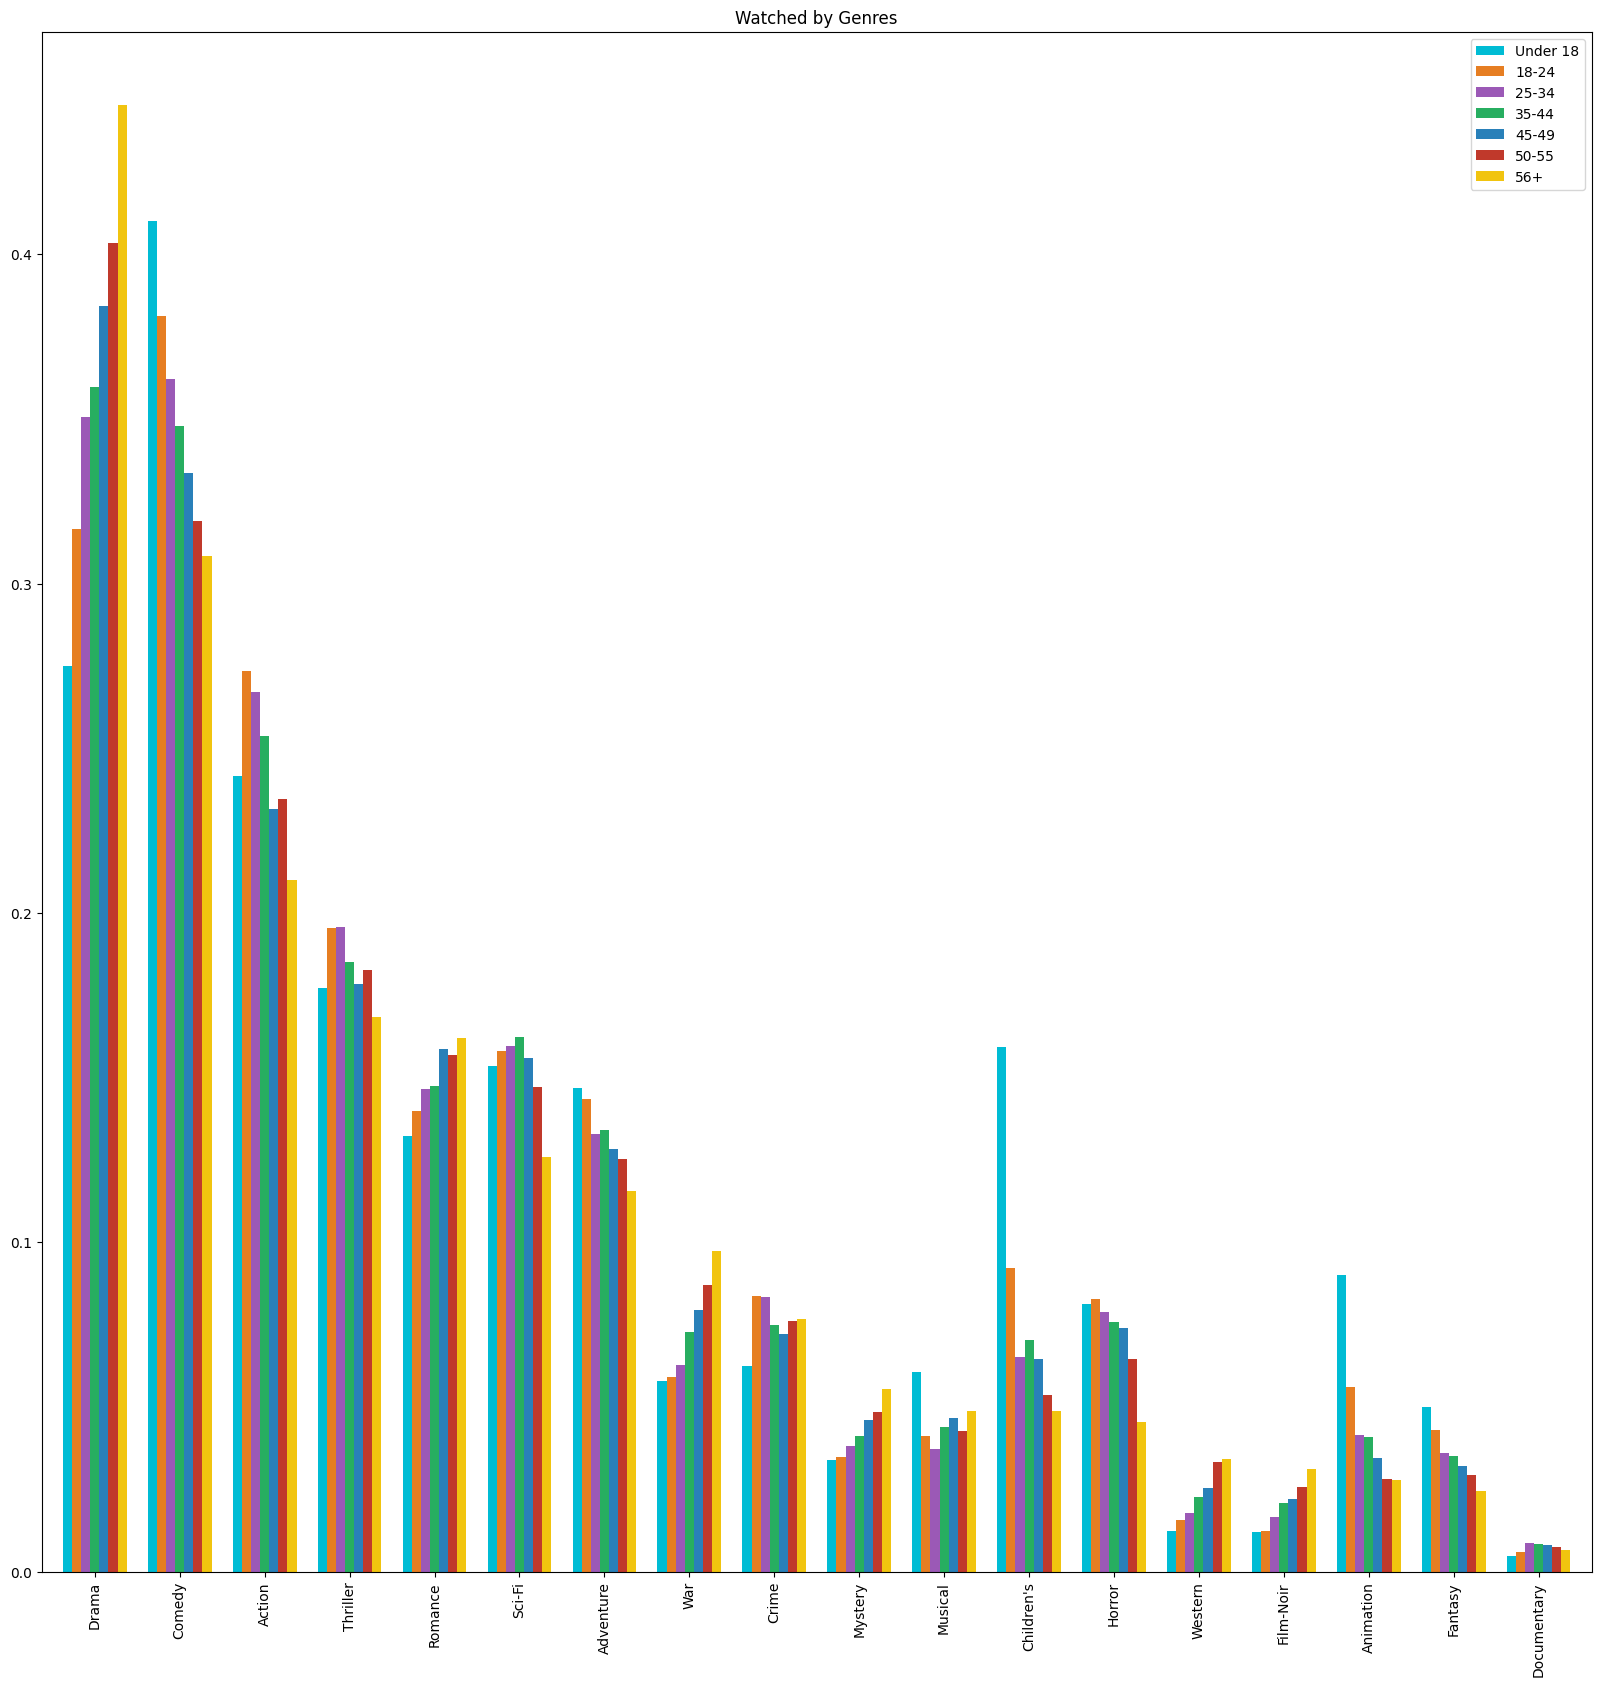

In [23]:
df_age.plot.bar(y=[('Under 18', 'portion'), ('18-24', 'portion'), ('25-34', 'portion'), ('35-44', 'portion'), ('45-49', 'portion'), ('50-55', 'portion'), ('56+', 'portion')], color= ['#00BCD4', '#E67E22', '#9B59B6', '#27AE60', '#2980B9', '#C0392B', '#F1C40F'], width=0.75, figsize=((20,20)))
plt.title('Watched by Genres')
plt.legend(['Under 18','18-24','25-34','35-44','45-49','50-55','56+'])
plt.savefig('counts by genres.png')

## 二、用户对电影的打分预测

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import datetime
from sklearn.decomposition import TruncatedSVD



In [25]:
# Reading ratings file
ratings = pd.read_csv('./ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('./users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('./movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])
print(movies.shape)

# Reading movies info file
movies_info = pd.read_csv('./info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

(3883, 3)


### 数据清洗

In [26]:
print(ratings.shape)
# 数据清洗
# 计算每部电影的平均分和标准差
rating_mean = ratings.groupby('movie_id')['rating'].transform('mean')
rating_std = ratings.groupby('movie_id')['rating'].transform('std')

# 计算 z-score
ratings['z_score'] = (ratings['rating'] - rating_mean) / rating_std

# 筛选出异常打分，我们这里以 z-score 绝对值大于1.5作为判定标准
outliers = ratings[ratings['z_score'].abs() > 1.5]

# 删除这些异常的评分
ratings = ratings.drop(outliers.index)
print(ratings.shape)

(1000209, 4)
(884132, 5)


In [27]:
ratings['user_id'] = ratings['user_id'] - 1
ratings['movie_id'] = ratings['movie_id'] - 1

ratings

,user_id,movie_id,rating,timestamp,z_score
0,0,1192,5,978300760,0.771700
1,0,660,3,978302109,-0.454223
2,0,913,3,978301968,-1.320687
3,0,3407,4,978300275,0.151941
4,0,2354,5,978824291,1.302907
...,...,...,...,...,...
1000203,6039,1089,3,956715518,-1.259330
1000205,6039,1093,5,956704887,1.261650
1000206,6039,561,5,956704746,1.156000
1000207,6039,1095,4,956715648,0.023503


## 特征工程

### 对于用户的性别，年龄，职业进行one-hot encoding

In [28]:
# One-Hot编码处理性别、年龄、职业
encoder = OneHotEncoder()
user_features = encoder.fit_transform(users[['gender', 'age_desc', 'occ_desc']])
user_features_df = pd.DataFrame(user_features.toarray(), columns=encoder.get_feature_names_out(['gender', 'age_desc', 'occ_desc']))
display(user_features_df)


,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,age_desc_Under 18,occ_desc_K-12 student,...,occ_desc_other or not specified,occ_desc_programmer,occ_desc_retired,occ_desc_sales/marketing,occ_desc_scientist,occ_desc_self-employed,occ_desc_technician/engineer,occ_desc_tradesman/craftsman,occ_desc_unemployed,occ_desc_writer
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6036,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 对于电影类型进行one-hot encoding
MultiLabelBinarizer()用于将类别标签的列表转换为独热编码（one-hot encoding）格式

In [29]:
# 处理电影类型，先转换为列表格式
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
mlb = MultiLabelBinarizer()
movie_genres_encoded = mlb.fit_transform(movies['genres'])
movie_genres_df = pd.DataFrame(movie_genres_encoded, columns=mlb.classes_)
movie_genres_df['movie_id'] = movies['movie_id'].values
movie_genres_df

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_id
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3948
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3949
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3950
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3951


### 对于电影简介用TF-IDF模型进行向量化

In [30]:
#对于电影简介应用TF-IDF
movies_info['intro'] = movies_info['intro'].fillna('')
tfidf_vectorizer = TfidfVectorizer()
movie_synopses_tfidf = tfidf_vectorizer.fit_transform(movies_info['intro'])
svd = TruncatedSVD(n_components=300) 
reduced_tfidf_matrix = svd.fit_transform(movie_synopses_tfidf)
print(reduced_tfidf_matrix.shape)
movie_synopses_df = pd.DataFrame(reduced_tfidf_matrix, columns=[f'component_{i}' for i in range(300)])
movie_synopses_df['movie_id'] = movies_info['movie_id'].values
movie_synopses_df

(9742, 300)


,component_0,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,...,component_291,component_292,component_293,component_294,component_295,component_296,component_297,component_298,component_299,movie_id
0,0.099337,0.035547,-0.024947,0.019571,0.046639,0.071339,-0.008078,-0.031367,0.036254,-0.024565,...,0.000446,-0.011980,0.009180,0.002095,-0.007809,0.020507,0.007354,-0.003947,-0.003154,1
1,0.190681,-0.034951,0.007536,0.098535,0.047358,0.022317,-0.066872,0.009589,-0.014988,0.063348,...,-0.015624,-0.009764,-0.020873,-0.002937,0.007054,-0.010807,0.008489,0.013275,-0.010950,2
2,0.110723,0.005116,-0.004970,0.087970,-0.015440,-0.005176,0.041314,0.037990,0.016526,-0.064645,...,0.002395,-0.009980,-0.025773,-0.018036,-0.002304,0.017694,0.013353,-0.037479,0.003055,3
3,0.116423,-0.066780,0.027517,0.051326,-0.055155,0.039680,-0.052355,0.055565,-0.047072,-0.033048,...,-0.014192,0.010841,-0.015203,0.000889,-0.033533,0.046473,-0.032159,0.028739,0.041572,4
4,0.194737,0.005282,-0.090922,-0.092917,-0.096939,-0.026375,-0.047800,0.031986,-0.063234,0.005400,...,0.027050,0.004824,0.011970,0.017117,-0.010375,-0.004870,0.009220,0.010846,-0.009174,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0.183166,0.006318,-0.041856,0.006047,-0.080114,-0.033866,-0.002425,0.015631,0.004700,0.038592,...,-0.020433,-0.006912,-0.011925,-0.029124,-0.006307,-0.029604,-0.056700,-0.016552,-0.034802,193581
9738,0.230420,-0.219906,0.065946,-0.096181,-0.015803,-0.062846,0.000964,-0.021251,-0.003109,0.012261,...,-0.000901,0.006487,-0.002214,-0.010869,-0.007935,0.013072,-0.056491,0.019685,0.019310,193583
9739,0.185116,0.049682,0.124095,-0.049192,-0.042721,0.015445,-0.015053,-0.008369,-0.085175,-0.008879,...,-0.006298,-0.002379,0.006430,0.002008,0.002947,0.020338,-0.016996,0.000934,0.005313,193585
9740,0.150256,-0.075536,0.028974,0.030413,0.010567,0.027287,-0.049144,-0.025067,0.036160,0.003992,...,-0.020837,-0.006234,-0.020972,-0.020241,0.008982,0.005909,-0.025791,0.015533,0.013801,193587


### 把ratings，用户的性别，年龄，职业，电影类型，电影简介的特征进行融合

In [31]:
user_ratings_df = pd.merge(ratings, user_features_df, left_on="user_id", right_index=True, how='outer')
user_ratings_df = pd.merge(user_ratings_df, movie_genres_df, on='movie_id', how='left')
user_ratings_df = pd.merge(user_ratings_df, movie_synopses_df, on='movie_id', how='left')
columns_to_drop = [ 'timestamp', 'rating','z_score']
user_ratings_df = user_ratings_df.drop(columns=columns_to_drop, errors='ignore')
user_ratings_df = user_ratings_df.fillna(0)
user_ratings_df

,user_id,movie_id,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,...,component_290,component_291,component_292,component_293,component_294,component_295,component_296,component_297,component_298,component_299
0,0,1192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.015147,-0.007356,0.015185,0.025307,0.021047,0.012068,0.013224,0.030050,0.020411,-0.005014
1,0,660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.007488,-0.004619,0.020570,0.014200,-0.023404,0.011741,-0.001507,0.008387,0.038939,-0.012412
3,0,3407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,2354,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.005117,0.008159,0.004266,0.007219,-0.018495,0.008055,-0.010287,-0.005624,0.023990,0.023490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884127,6039,1089,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.012214,0.007626,0.012390,0.024474,0.016074,-0.005586,0.018964,0.000703,-0.005380,0.040314
884128,6039,1093,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018821,-0.036466,-0.015374,-0.007149,-0.003460,0.008408,0.035993,0.027728,-0.008573,0.003795
884129,6039,561,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
884130,6039,1095,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.012353,0.004731,0.013650,-0.019768,-0.035497,0.020323,0.022258,0.003996,-0.059639,-0.058241


### 降维之前先对数据标准化

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(user_ratings_df)

X_scaled_df = pd.DataFrame(X_scaled, columns=user_ratings_df.columns, index=user_ratings_df.index)

X_scaled_df

,user_id,movie_id,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,...,component_290,component_291,component_292,component_293,component_294,component_295,component_296,component_297,component_298,component_299
0,-1.749284,-0.610105,1.760304,-1.760304,-0.469772,-0.809716,-0.501119,-0.30355,-0.281094,-0.201509,...,-0.770382,-0.365096,0.747571,1.238860,1.067306,0.635444,0.647825,1.588715,1.067424,-0.274825
1,-1.749284,-1.095594,1.760304,-1.760304,-0.469772,-0.809716,-0.501119,-0.30355,-0.281094,-0.201509,...,0.017421,0.008863,-0.036134,-0.040168,-0.004708,0.018899,-0.052985,-0.002910,-0.004076,-0.005295
2,-1.749284,-0.864713,1.760304,-1.760304,-0.469772,-0.809716,-0.501119,-0.30355,-0.281094,-0.201509,...,-0.372014,-0.225956,1.025538,0.677514,-1.196775,0.618754,-0.132825,0.441331,2.040047,-0.672536
3,-1.749284,1.411245,1.760304,-1.760304,-0.469772,-0.809716,-0.501119,-0.30355,-0.281094,-0.201509,...,0.017421,0.008863,-0.036134,-0.040168,-0.004708,0.018899,-0.052985,-0.002910,-0.004076,-0.005295
4,-1.749284,0.450305,1.760304,-1.760304,-0.469772,-0.809716,-0.501119,-0.30355,-0.281094,-0.201509,...,-0.248703,0.423628,0.184048,0.324708,-0.946723,0.430415,-0.598149,-0.300772,1.255281,1.257503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884127,1.746070,-0.704100,-0.568084,0.568084,-0.469772,1.235000,-0.501119,-0.30355,-0.281094,-0.201509,...,0.652656,0.396550,0.603316,1.196761,0.814009,-0.266476,0.951997,0.034324,-0.286490,2.161946
884128,1.746070,-0.700450,-0.568084,0.568084,-0.469772,1.235000,-0.501119,-0.30355,-0.281094,-0.201509,...,0.996280,-1.844868,-0.829627,-0.401483,-0.180957,0.448458,1.854398,1.465777,-0.454125,0.198736
884129,1.746070,-1.185939,-0.568084,0.568084,-0.469772,1.235000,-0.501119,-0.30355,-0.281094,-0.201509,...,0.017421,0.008863,-0.036134,-0.040168,-0.004708,0.018899,-0.052985,-0.002910,-0.004076,-0.005295
884130,1.746070,-0.698625,-0.568084,0.568084,-0.469772,1.235000,-0.501119,-0.30355,-0.281094,-0.201509,...,-0.625037,0.249361,0.668363,-1.039238,-1.812708,1.057248,1.126527,0.208746,-3.134847,-3.136288


### 累积方差PCA降维

In [33]:
from sklearn.decomposition import PCA

# 初始化 PCA
pca = PCA()
pca.fit(X_scaled)

# 累计方差
cumulative_variance = pca.explained_variance_ratio_.cumsum()
# 选择达到 90% 累计方差的组件数量
n_components = (cumulative_variance > 0.9).argmax() + 1
print(f'Number of components to keep for 90% variance: {n_components}')
# 重新应用 PCA 保留所需的组件
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca

Number of components to keep for 90% variance: 260


array([[-0.57741794, -0.65392083, -1.07890307, ..., -0.06562337,
        -0.23911991, -0.45940994],
       [-0.15239704,  0.46233017, -0.76341652, ..., -0.06442785,
        -0.09045108, -0.12886471],
       [-3.19203005,  0.41600024, -2.72868427, ...,  1.13340276,
        -0.30741264,  0.20025415],
       ...,
       [-0.62653592, -0.05291257, -0.11564922, ..., -0.19305584,
         0.26427432,  0.31257242],
       [-0.52868082,  0.99643612, -2.57097124, ..., -0.92627239,
        -0.1151342 , -1.28604118],
       [-0.95490733,  0.81193903, -0.76323706, ...,  0.20668903,
        -0.97457138, -0.35137683]])

### 自己实现的MSE

In [34]:
def my_mean_squared_error(y_true, y_pred):
    # 计算 y_true 和 y_pred 之间的差异
    differences = y_true - y_pred
    
    # 计算差异的平方
    squared_differences = np.square(differences)
    
    # 计算均方误差
    mse = np.mean(squared_differences)
    
    return mse

In [35]:
X_pca.shape

(884132, 260)

In [36]:
!pip install lightgbm

## 两个不同的模型分别训练

### 使用lightgbm的gbdt模型进行训练

#### 不使用PCA降维后的数据

In [37]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(user_ratings_df, ratings['rating'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('加载数据') 
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 400,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练')
gbm = lgb.train(params,
                train_data,
                num_boost_round=750,
                valid_sets=[val_data],
                callbacks=[lgb.callback.early_stopping(stopping_rounds=20)])
print('预测数据')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

mse = my_mean_squared_error(y_test, y_pred)
print("MSE:", mse)

加载数据
开始训练
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[263]	valid_0's rmse: 0.726159
预测数据
MSE: 0.527190163231906


#### 使用PCA降维后的数据，发现原数据效果更好

In [38]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X_pca, ratings['rating'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('加载数据') 
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 400,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练')
gbm = lgb.train(params,
                train_data,
                num_boost_round=750,
                valid_sets=[val_data],
                callbacks=[lgb.callback.early_stopping(stopping_rounds=20)])
print('预测数据')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

mse = my_mean_squared_error(y_test, y_pred)
print("MSE:", mse)

加载数据
开始训练
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[160]	valid_0's rmse: 0.761659
预测数据
MSE: 0.5797190529602435


### 使用RandomForest模型进行训练

In [39]:
params = {
    'boosting_type': 'rf',  
    'objective': 'regression',  
    'num_leaves': 320,  
    'max_depth': 64,  
    'bagging_freq': 1,  
    'bagging_fraction': 0.8, 
    'feature_fraction': 0.8,  
    'num_iterations': 800,
    'verbose': -1
}

gbm = lgb.train(params,
                train_data,
                num_boost_round=300,
                valid_sets=[train_data, val_data],
                callbacks=[lgb.callback.early_stopping(stopping_rounds=10)])

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

mse = my_mean_squared_error(y_test, y_pred)
print("MSE:", mse)

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	training's l2: 0.612411	valid_1's l2: 0.61903
MSE: 0.6187212889033635


## 三、电影海报聚类分析

### 图像特征提取

In [40]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torch
from img2vec_pytorch import Img2Vec
from tqdm import tqdm



# 文件夹路径
folder_path = "./poster"

# 初始化特征列表
features = []
# 颜色直方图特征列表
hist_list_r = []
hist_list_g = []
hist_list_b = []
# 灰度直方图特征列表
hist_list_gray = []
img2vec_model = Img2Vec()
# 遍历文件夹中的每个海报图像
for filename in tqdm(os.listdir(folder_path), desc="Processing images"):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # 读取图像
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # 提取颜色直方图和灰度直方图特征
        image = Image.open(image_path)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        
        # 特征向量
        vector = img2vec_model.get_vec(image)
        
        image = np.array(image)
        # 颜色直方图特征
        hist_list_r.append(cv2.calcHist([image], [0], None, [256], [0, 256]))
        hist_list_g.append(cv2.calcHist([image], [1], None, [256], [0, 256]))
        hist_list_b.append(cv2.calcHist([image], [2], None, [256], [0, 256]))
        # 转换为灰度图并计算灰度直方图
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        hist_list_gray.append(cv2.calcHist([gray_image], [0], None, [256], [0, 256]))

        # 添加图像文件前缀（电影ID）和特征向量到特征列表中
        features.append([filename.split('.')[0], vector, hist_list_r, hist_list_g, hist_list_b, hist_list_gray])

# 将特征列表转换为DataFrame
columns = ['movie_id', 'features',  'hist_list_r', 'hist_list_g', 'hist_list_b', 'hist_list_gray']
movie_posters_feature = pd.DataFrame(features, columns=columns)
df = movie_posters_feature[['movie_id', 'features']]

# 输出带有电影ID和特征向量的DataFrame
print("DataFrame with Movie ID and Features:")
display(df)
display(movie_posters_feature)

Processing images: 100%|██████████| 2938/2938 [04:06<00:00, 11.92it/s]

DataFrame with Movie ID and Features:


,movie_id,features
0,63,"[0.03181032, 0.46793038, 0.8066902, 0.43698192..."
1,823,"[0.5453302, 2.6612425, 0.052590944, 0.48094624..."
2,3578,"[0.04320019, 0.38610318, 0.8370014, 0.0, 0.746..."
3,2100,"[0.10941286, 2.0392606, 0.9851443, 0.60722995,..."
4,1409,"[0.17741239, 1.0916648, 0.19859666, 0.00152083..."
...,...,...
2933,3213,"[0.75684, 1.1267841, 4.2811894, 0.48052293, 0...."
2934,190,"[0.10447608, 1.7208096, 0.23858014, 0.5907072,..."
2935,184,"[1.6203058, 2.8042035, 0.4590373, 0.41096124, ..."
2936,2119,"[0.4647879, 0.66003233, 0.27837896, 0.24570736..."


,movie_id,features,hist_list_r,hist_list_g,hist_list_b,hist_list_gray
0,63,"[0.03181032, 0.46793038, 0.8066902, 0.43698192...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
1,823,"[0.5453302, 2.6612425, 0.052590944, 0.48094624...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
2,3578,"[0.04320019, 0.38610318, 0.8370014, 0.0, 0.746...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
3,2100,"[0.10941286, 2.0392606, 0.9851443, 0.60722995,...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
4,1409,"[0.17741239, 1.0916648, 0.19859666, 0.00152083...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
...,...,...,...,...,...,...
2933,3213,"[0.75684, 1.1267841, 4.2811894, 0.48052293, 0....","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
2934,190,"[0.10447608, 1.7208096, 0.23858014, 0.5907072,...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
2935,184,"[1.6203058, 2.8042035, 0.4590373, 0.41096124, ...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."
2936,2119,"[0.4647879, 0.66003233, 0.27837896, 0.24570736...","[[[47.0], [29.0], [13.0], [63.0], [76.0], [32....","[[[535.0], [76.0], [89.0], [79.0], [80.0], [10...","[[[1728.0], [132.0], [155.0], [162.0], [162.0]...","[[[22.0], [147.0], [113.0], [105.0], [125.0], ..."


### 降维

#### PCA降维

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

feature_vectors = np.array(df['features'].to_list())
scaler = StandardScaler()
features_scaled = scaler.fit_transform(feature_vectors)

pca = PCA()
pca.fit(features_scaled)

# 计算累计方差
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 选择累积方差达到90%的主成分数量
num_components = (cumulative_variance > 0.9).argmax() + 1

pca = PCA(n_components=num_components)
features_reduced = pca.fit_transform(features_scaled)

print(f"Reduced feature dimension: {num_components}")

reduced_df = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(num_components)])
#reduced_df['movie_id'] = df['movie_id']

print("DataFrame with Reduced Features and Movie ID:")
display(reduced_df)

movie_posters_feature_pca = movie_posters_feature.merge(pd.DataFrame(reduced_df),left_index=True,right_index=True).drop([ 'features', 'hist_list_r', 'hist_list_g', 'hist_list_b', 'hist_list_gray'],axis=1)
display(movie_posters_feature_pca)

Reduced feature dimension: 194
DataFrame with Reduced Features and Movie ID:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194
0,4.680543,-7.299921,-0.686684,4.241247,-3.433807,1.212299,8.472734,-0.913470,-4.802963,-2.246998,...,-0.316046,0.418274,0.042712,-1.019390,-0.864431,1.590086,0.573746,-0.606221,-0.129614,0.314835
1,-3.539838,3.624622,-3.641819,2.497328,-0.689036,-2.543117,-0.624243,-3.226275,0.464061,2.277241,...,1.360221,0.702344,-0.130342,-0.422566,0.381545,0.844292,0.187169,0.374933,-0.046209,-1.267079
2,7.734733,0.743982,-3.549129,-2.836249,-0.748971,-5.087497,3.402232,0.290454,-4.993399,-5.913076,...,-0.515160,0.086113,0.255805,-0.284831,-1.045057,-2.122768,-0.131696,-0.415737,-0.007457,-0.155208
3,6.980178,2.908044,-7.932039,-2.194339,4.528354,1.325724,-1.535233,0.901888,-1.262091,-1.251867,...,-0.601016,-0.306826,-1.356629,0.049401,-0.348933,-0.484692,-0.618927,0.388729,-0.005013,-0.328115
4,-0.982139,4.860287,-3.844361,1.389059,-1.359171,-5.743465,-2.013213,2.045427,-0.201247,-2.285893,...,-0.012447,-0.036070,-0.521045,-0.072486,0.034782,0.371967,0.088974,-0.657248,0.736670,-0.013966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,9.029295,-2.957917,2.954772,1.299635,-3.155543,6.351065,-2.286512,-2.402398,2.658222,1.767339,...,1.834877,0.837761,0.032257,0.808823,-0.719864,-0.438061,0.451736,1.736539,-1.144298,-0.611536
2934,0.595529,-3.264481,-4.395749,-4.635106,-0.309603,1.561521,-0.238212,-4.749167,-3.188457,-5.135460,...,0.843287,-0.397085,-1.186073,0.622497,-0.781365,-0.195083,-1.067208,-0.170339,-0.129941,-0.364535
2935,1.133981,3.587270,3.427102,-0.225228,3.307795,1.893212,3.571995,-0.185228,1.823998,-1.705555,...,-0.199481,0.499326,0.552221,-0.367145,0.756213,-0.233133,-0.439653,-1.067104,1.165946,0.031941
2936,-1.417861,4.085181,1.745645,-4.928088,-4.674751,0.358603,1.770584,0.063676,-1.388779,4.813683,...,0.591262,0.266091,0.932449,0.056679,-0.814245,-0.969460,-1.042819,0.705849,-0.004869,1.125621


,movie_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194
0,63,4.680543,-7.299921,-0.686684,4.241247,-3.433807,1.212299,8.472734,-0.913470,-4.802963,...,-0.316046,0.418274,0.042712,-1.019390,-0.864431,1.590086,0.573746,-0.606221,-0.129614,0.314835
1,823,-3.539838,3.624622,-3.641819,2.497328,-0.689036,-2.543117,-0.624243,-3.226275,0.464061,...,1.360221,0.702344,-0.130342,-0.422566,0.381545,0.844292,0.187169,0.374933,-0.046209,-1.267079
2,3578,7.734733,0.743982,-3.549129,-2.836249,-0.748971,-5.087497,3.402232,0.290454,-4.993399,...,-0.515160,0.086113,0.255805,-0.284831,-1.045057,-2.122768,-0.131696,-0.415737,-0.007457,-0.155208
3,2100,6.980178,2.908044,-7.932039,-2.194339,4.528354,1.325724,-1.535233,0.901888,-1.262091,...,-0.601016,-0.306826,-1.356629,0.049401,-0.348933,-0.484692,-0.618927,0.388729,-0.005013,-0.328115
4,1409,-0.982139,4.860287,-3.844361,1.389059,-1.359171,-5.743465,-2.013213,2.045427,-0.201247,...,-0.012447,-0.036070,-0.521045,-0.072486,0.034782,0.371967,0.088974,-0.657248,0.736670,-0.013966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,3213,9.029295,-2.957917,2.954772,1.299635,-3.155543,6.351065,-2.286512,-2.402398,2.658222,...,1.834877,0.837761,0.032257,0.808823,-0.719864,-0.438061,0.451736,1.736539,-1.144298,-0.611536
2934,190,0.595529,-3.264481,-4.395749,-4.635106,-0.309603,1.561521,-0.238212,-4.749167,-3.188457,...,0.843287,-0.397085,-1.186073,0.622497,-0.781365,-0.195083,-1.067208,-0.170339,-0.129941,-0.364535
2935,184,1.133981,3.587270,3.427102,-0.225228,3.307795,1.893212,3.571995,-0.185228,1.823998,...,-0.199481,0.499326,0.552221,-0.367145,0.756213,-0.233133,-0.439653,-1.067104,1.165946,0.031941
2936,2119,-1.417861,4.085181,1.745645,-4.928088,-4.674751,0.358603,1.770584,0.063676,-1.388779,...,0.591262,0.266091,0.932449,0.056679,-0.814245,-0.969460,-1.042819,0.705849,-0.004869,1.125621


#### t-SNE降维

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 2938 samples in 0.000s...
[t-SNE] Computed neighbors for 2938 samples in 0.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2938
[t-SNE] Computed conditional probabilities for sample 2000 / 2938
[t-SNE] Computed conditional probabilities for sample 2938 / 2938
[t-SNE] Mean sigma: 3.861883
[t-SNE] KL divergence after 50 iterations with early exaggeration: 80.941895
[t-SNE] KL divergence after 5000 iterations: 2.763981


array([[ 10.56846  ,  39.208168 ],
       [ -2.921227 , -16.845446 ],
       [-34.099957 ,  29.674147 ],
       ...,
       [  1.3731526, -37.8409   ],
       [-11.969199 ,  13.588056 ],
       [-44.43874  ,  -3.3052874]], dtype=float32)

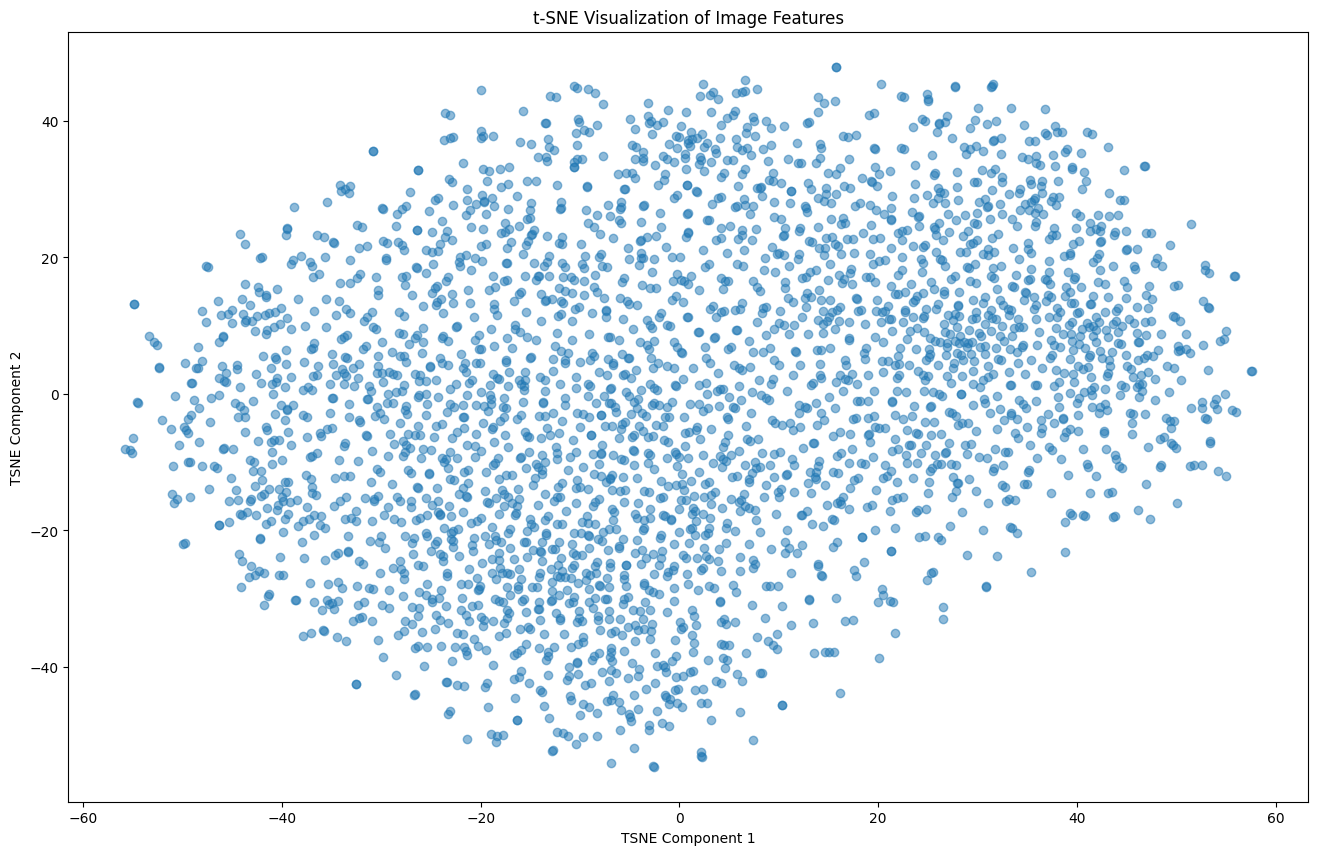

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=5000)
tsne_results = tsne.fit_transform(feature_vectors)

display(tsne_results)

plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.5)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE Visualization of Image Features')
plt.show()

### 无监督聚类分析

In [43]:
from sklearn.cluster import KMeans

k = 8  
kmeans = KMeans(n_clusters=k, random_state=42)

# 拟合模型
kmeans.fit(features_reduced)

# 获取聚类标签
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

distances = np.linalg.norm(features_reduced - cluster_centers[cluster_labels], axis=1)

representative_images = []
for i in range(len(cluster_centers)):
    cluster_indices = np.where(cluster_labels == i)[0]
    sorted_indices = np.argsort(distances[cluster_indices])[:5]
    representative_images.append(cluster_indices[sorted_indices])

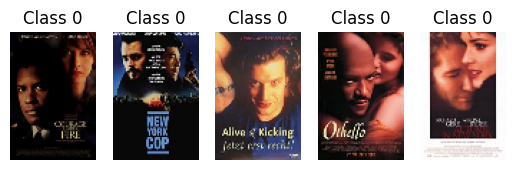

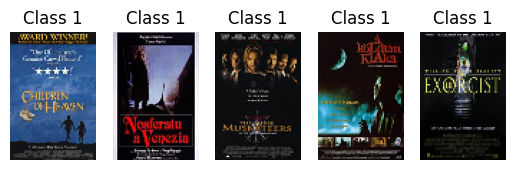

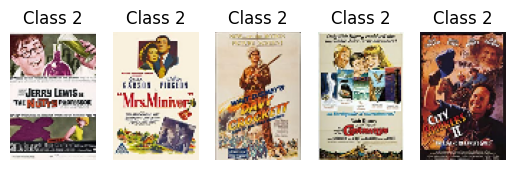

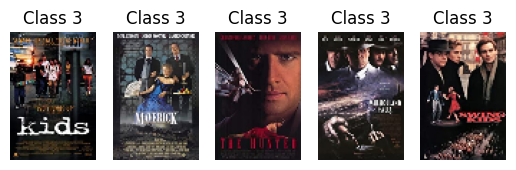

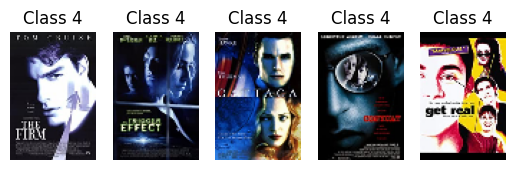

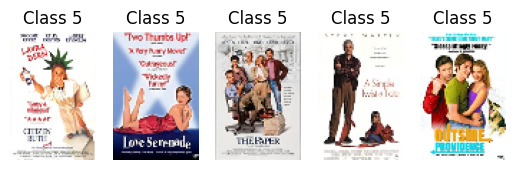

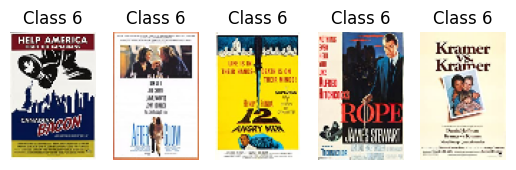

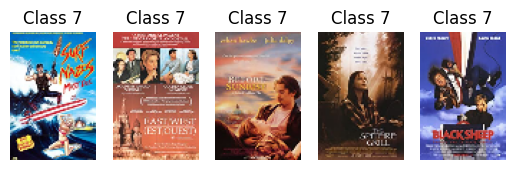

In [44]:
for i, indices in enumerate(representative_images):
    for j, index in enumerate(indices):
        # 读取代表性图像
        filenames = os.listdir(folder_path)
        representative_image_path = os.path.join(folder_path, filenames[index])
        representative_image = cv2.imread(representative_image_path)
        representative_image = cv2.resize(representative_image, (60, 90))  # 根据需要调整这些值
        # 绘制图像
        plt.subplot(1, 5, j+1)  # 确保图像在一行中显示
        plt.imshow(cv2.cvtColor(representative_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Class {i}")
        plt.axis("off")
    plt.show()

### 有监督聚类分析

In [45]:
import pandas as pd

# 读取CSV文件
movies_df = pd.read_csv("./movies.csv")

# 提取genre信息
genres = movies_df['genres']
# 初始化genre的字典
genre_dict = {}

# 遍历每个电影的genre信息
for genre_string in genres:
    # 将genre字符串按照"|"分割成列表
    genre_list = genre_string.split("|")
    # 遍历列表中的每个genre
    for genre in genre_list:
        # 将genre添加到字典中，如果已存在则不重复添加
        if genre not in genre_dict:
            genre_dict[genre] = len(genre_dict)

# 输出genre字典
print("Genre Dictionary:")
print(genre_dict)

Genre Dictionary:
{'Animation': 0, "Children's": 1, 'Comedy': 2, 'Adventure': 3, 'Fantasy': 4, 'Romance': 5, 'Drama': 6, 'Action': 7, 'Crime': 8, 'Thriller': 9, 'Horror': 10, 'Sci-Fi': 11, 'Documentary': 12, 'War': 13, 'Musical': 14, 'Mystery': 15, 'Film-Noir': 16, 'Western': 17}


In [46]:
# 将genre信息转换为向量形式
genre_vectors = []

# 遍历每个电影的genre信息
for genre_string in genres:
    # 将genre字符串按照"|"分割成列表
    genre_list = genre_string.split("|")
    # 初始化genre向量
    genre_vector = [0] * len(genre_dict)
    # 根据genre列表设置向量中对应的位置为1
    for genre in genre_list:
        genre_vector[genre_dict[genre]] = 1
    # 将genre向量添加到列表中
    genre_vectors.append(genre_vector)

# 将genre向量转换为列表
genre_lists = [list(genre_vector) for genre_vector in genre_vectors]

# 将genre列表添加到movies_df中
movies_df['genre_vector'] = genre_lists

# 输出带有genre向量的movies_df
print("Movies DataFrame with Genre Vector:")
display(movies_df)

Movies DataFrame with Genre Vector:


,Unnamed: 0,movie_id,title,genres,genre_vector
0,0,1,Toy Story (1995),Animation|Children's|Comedy,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,3,Grumpier Old Men (1995),Comedy|Romance,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,4,Waiting to Exhale (1995),Comedy|Drama,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,5,Father of the Bride Part II (1995),Comedy,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
3878,3878,3948,Meet the Parents (2000),Comedy,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3879,3879,3949,Requiem for a Dream (2000),Drama,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3880,3880,3950,Tigerland (2000),Drama,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3881,3881,3951,Two Family House (2000),Drama,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [47]:
# 将电影ID列转换为整数类型
movies_df['movie_id'] = movies_df['movie_id'].astype(int)
df['movie_id'] = df['movie_id'].astype(int)
movie_posters_feature_pca['movie_id'] = movie_posters_feature_pca['movie_id'].astype(int)

In [48]:

# 使用 merge 方法按照 movie_id 合并两个 DataFrame
merged_df = pd.merge(movies_df, df, on='movie_id', how='inner')
merged_df = merged_df.merge(movie_posters_feature_pca, on='movie_id', how='inner' )
merged_df = merged_df.merge(movie_synopses_df, on='movie_id', how='left')
# 输出合并后的 DataFrame
print("Merged DataFrame:")
display(merged_df)

info_array = merged_df.drop(['Unnamed: 0','title','genres','genre_vector','features'],axis = 1).values
display(info_array)

Merged DataFrame:


,Unnamed: 0,movie_id,title,genres,genre_vector,features,PC1,PC2,PC3,PC4,...,component_290,component_291,component_292,component_293,component_294,component_295,component_296,component_297,component_298,component_299
0,0,1,Toy Story (1995),Animation|Children's|Comedy,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.2273524, 1.1728463, 0.29160905, 3.7952769, ...",5.052878,-9.854247,0.949616,3.875231,...,0.001370,0.000446,-0.011980,0.009180,0.002095,-0.007809,0.020507,0.007354,-0.003947,-0.003154
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.8231486, 0.4003642, 0.5189067, 0.16395542, ...",7.416086,2.896805,7.646867,-2.883853,...,-0.004747,-0.015624,-0.009764,-0.020873,-0.002937,0.007054,-0.010807,0.008489,0.013275,-0.010950
2,2,3,Grumpier Old Men (1995),Comedy|Romance,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.007050384, 0.78249085, 0.46231297, 0.0, 0.4...",7.548541,-0.950343,-5.268845,-5.071440,...,0.046244,0.002395,-0.009980,-0.025773,-0.018036,-0.002304,0.017694,0.013353,-0.037479,0.003055
3,3,4,Waiting to Exhale (1995),Comedy|Drama,"[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.07367667, 0.35192728, 0.3781179, 0.34633523...",2.409097,-1.863832,-8.236532,0.623533,...,0.007370,-0.014192,0.010841,-0.015203,0.000889,-0.033533,0.046473,-0.032159,0.028739,0.041572
4,4,5,Father of the Bride Part II (1995),Comedy,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.7759661, 1.6042542, 1.205175, 0.038728107, ...",-0.754860,10.612558,-2.918940,5.301328,...,0.011865,0.027050,0.004824,0.011970,0.017117,-0.010375,-0.004870,0.009220,0.010846,-0.009174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,3878,3948,Meet the Parents (2000),Comedy,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.028654605, 0.64670074, 0.0023798177, 0.0145...",-3.278469,0.122054,-6.715706,-7.240779,...,-0.006097,0.016744,0.000263,-0.043803,-0.033990,0.018510,0.021187,-0.005141,0.002256,0.010040
2934,3879,3949,Requiem for a Dream (2000),Drama,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.6739974, 2.119938, 0.33157983, 1.6450741, 0...",6.348232,-3.123406,2.381994,4.579054,...,0.005001,0.013071,0.003409,0.016881,0.019915,0.016108,0.003333,0.011638,-0.006260,-0.005938
2935,3880,3950,Tigerland (2000),Drama,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.10695434, 0.5365823, 0.5666965, 0.5681928, ...",3.985478,0.830995,2.871481,-4.556269,...,0.010155,-0.013656,-0.017253,-0.002482,0.014976,0.009337,0.013814,0.016628,-0.010036,-0.014584
2936,3881,3951,Two Family House (2000),Drama,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.13103503, 2.0765557, 0.45924705, 1.2808481,...",5.126016,2.323493,-1.081866,2.211991,...,0.008424,-0.008745,0.002912,-0.001978,0.004108,0.005260,-0.013639,0.014552,0.002399,0.006829


array([[ 1.00000000e+00,  5.05287790e+00, -9.85424709e+00, ...,
         7.35388558e-03, -3.94682523e-03, -3.15443205e-03],
       [ 2.00000000e+00,  7.41608572e+00,  2.89680505e+00, ...,
         8.48931119e-03,  1.32752315e-02, -1.09502102e-02],
       [ 3.00000000e+00,  7.54854059e+00, -9.50342596e-01, ...,
         1.33527122e-02, -3.74786031e-02,  3.05527733e-03],
       ...,
       [ 3.95000000e+03,  3.98547769e+00,  8.30995023e-01, ...,
         1.66275744e-02, -1.00356787e-02, -1.45840384e-02],
       [ 3.95100000e+03,  5.12601566e+00,  2.32349324e+00, ...,
         1.45518609e-02,  2.39947297e-03,  6.82922667e-03],
       [ 3.95200000e+03, -5.43028450e+00,  1.99347091e+00, ...,
        -1.17910954e-02, -2.08083373e-02, -1.31592390e-02]])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 提取特征和标签
X = np.array(merged_df['features'].tolist())
X = np.hstack((X,info_array))
print(X.shape)
y = np.array(merged_df['genre_vector'].tolist())

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(2938, 1007)


In [50]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(
    num_leaves=31, 
    learning_rate=0.05,
    n_estimators=150
)

multi_output_clf = MultiOutputClassifier(clf)

multi_output_clf.fit(X_train, y_train)

y_pred = multi_output_clf.predict(X_test)

average_accuracy = np.mean([accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])])
accuracy = accuracy_score(y_test, y_pred)
print(f'Average Accuracy: {average_accuracy}')
print(f'Accuracy: {accuracy}')



[LightGBM] [Info] Number of positive: 68, number of negative: 2282
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256785
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 1007
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028936 -> initscore=-3.513300
[LightGBM] [Info] Start training from score -3.513300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 174, number of negative: 2176
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 256785
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 1007
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074043 -> initscore=-2

### 给第二部分的特征加上海报内容进行预测

#### 加入无监督聚类结果并进行one-hot编码

In [51]:
movie_ids = df['movie_id']  # 确保这个 movie_id 列与你聚类的电影相对应

clusters_df = pd.DataFrame({
    'movie_id': movie_ids,
    'cluster_label': kmeans.labels_
})

In [52]:
user_ratings_df = pd.merge(user_ratings_df, clusters_df, on='movie_id', how='left')
user_ratings_df['cluster_label'] = user_ratings_df['cluster_label'].fillna(-1)  # 用-1表示无聚类信息
display(user_ratings_df)

,user_id,movie_id,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,...,component_291,component_292,component_293,component_294,component_295,component_296,component_297,component_298,component_299,cluster_label
0,0,1192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.007356,0.015185,0.025307,0.021047,0.012068,0.013224,0.030050,0.020411,-0.005014,3.0
1,0,660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
2,0,913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004619,0.020570,0.014200,-0.023404,0.011741,-0.001507,0.008387,0.038939,-0.012412,2.0
3,0,3407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
4,0,2354,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008159,0.004266,0.007219,-0.018495,0.008055,-0.010287,-0.005624,0.023990,0.023490,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884127,6039,1089,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.007626,0.012390,0.024474,0.016074,-0.005586,0.018964,0.000703,-0.005380,0.040314,6.0
884128,6039,1093,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.036466,-0.015374,-0.007149,-0.003460,0.008408,0.035993,0.027728,-0.008573,0.003795,4.0
884129,6039,561,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
884130,6039,1095,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.004731,0.013650,-0.019768,-0.035497,0.020323,0.022258,0.003996,-0.059639,-0.058241,7.0


In [53]:
user_ratings_df = pd.get_dummies(user_ratings_df, columns=['cluster_label'])
display(user_ratings_df)

,user_id,movie_id,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,...,component_299,cluster_label_-1.0,cluster_label_0.0,cluster_label_1.0,cluster_label_2.0,cluster_label_3.0,cluster_label_4.0,cluster_label_5.0,cluster_label_6.0,cluster_label_7.0
0,0,1192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.005014,False,False,False,False,True,False,False,False,False
1,0,660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,True,False,False,False,False,False,False,False,False
2,0,913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.012412,False,False,False,True,False,False,False,False,False
3,0,3407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,True,False,False,False,False,False,False,False,False
4,0,2354,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023490,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884127,6039,1089,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.040314,False,False,False,False,False,False,False,True,False
884128,6039,1093,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.003795,False,False,False,False,False,True,False,False,False
884129,6039,561,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,True,False,False,False,False,False,False,False,False
884130,6039,1095,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.058241,False,False,False,False,False,False,False,False,True


In [54]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(user_ratings_df, ratings['rating'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('加载数据') 
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 400,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练')
gbm = lgb.train(params,
                train_data,
                num_boost_round=750,
                valid_sets=[val_data],
                callbacks=[lgb.callback.early_stopping(stopping_rounds=20)])
print('预测数据')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

mse = my_mean_squared_error(y_test, y_pred)
print("MSE:", mse)

加载数据
开始训练
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[264]	valid_0's rmse: 0.725631
预测数据
MSE: 0.5269190152975602


#### 加入海报的特征

In [55]:
user_ratings_df = user_ratings_df.merge(movie_posters_feature_pca, on='movie_id', how='left')
user_ratings_df = user_ratings_df.fillna(0)
display(user_ratings_df)

,user_id,movie_id,gender_F,gender_M,age_desc_18-24,age_desc_25-34,age_desc_35-44,age_desc_45-49,age_desc_50-55,age_desc_56+,...,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194
0,0,1192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.985205,0.562189,0.127788,0.700753,-0.672936,0.003909,-1.211092,0.149917,-0.995623,0.340160
1,0,660,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,913,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.324656,0.675391,0.269058,-0.191073,1.056749,-0.040388,0.366353,0.250111,0.102843,-0.231671
3,0,3407,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,2354,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.178488,-0.358725,-0.305111,0.422231,0.859521,-0.277273,1.165004,0.643587,-0.231686,-0.186865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884127,6039,1089,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.691940,-0.317869,-0.824188,-0.724267,1.143943,1.178978,-0.735490,-1.459493,-0.583072,0.285682
884128,6039,1093,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.258148,0.568570,-1.839523,-0.150294,2.082351,1.915550,0.128195,1.469988,0.046027,0.049862
884129,6039,561,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
884130,6039,1095,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.355704,-0.233291,0.075949,0.257769,-0.706224,0.408247,0.362552,-0.677651,0.231573,1.154590


In [56]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(user_ratings_df, ratings['rating'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print('加载数据') 
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 400,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}
print('开始训练')
gbm = lgb.train(params,
                train_data,
                num_boost_round=750,
                valid_sets=[val_data],
                callbacks=[lgb.callback.early_stopping(stopping_rounds=20)])
print('预测数据')
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

mse = my_mean_squared_error(y_test, y_pred)
print("MSE:", mse)

加载数据
开始训练
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[272]	valid_0's rmse: 0.727052
预测数据
MSE: 0.5286129319616423
